In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.stats as stat

In [6]:
#read in python environment

In [7]:
wine_data = pd.read_csv(r'c:\Users\sivae\Downloads\Wine.csv')

In [8]:
wine_data

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [9]:
#Try out different clustering models in the wine dataset.


In [10]:
wine_data.hist(figsize =(10,10))

array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic_Acid'}>,
        <AxesSubplot:title={'center':'Ash'}>,
        <AxesSubplot:title={'center':'Ash_Alcanity'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total_Phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid_Phenols'}>],
       [<AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color_Intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280'}>],
       [<AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [11]:
wine_data.shape

(178, 13)

In [12]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [13]:
wine_data['Alcohol'].nunique()

126

C:\Users\sivae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


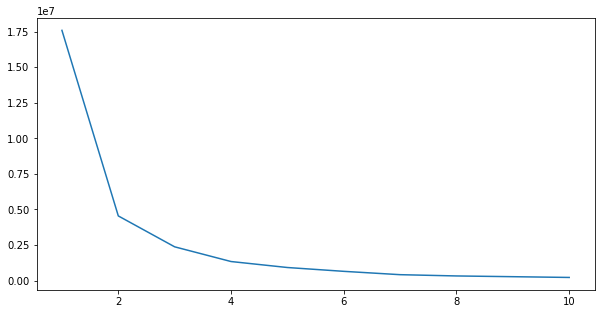

In [14]:
#Elbow method
plt.figure(figsize=(10,5))
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(wine_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

plt.show()

In [17]:
#KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
labels_2 = kmeans.fit_predict(wine_data)
labels_2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
#Silhoutte Score
from sklearn.metrics import silhouette_score
score_2 = silhouette_score(wine_data, labels_2, metric='euclidean')
print('Silhouette Score: %.3f' % score_2)

Silhouette Score: 0.657


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

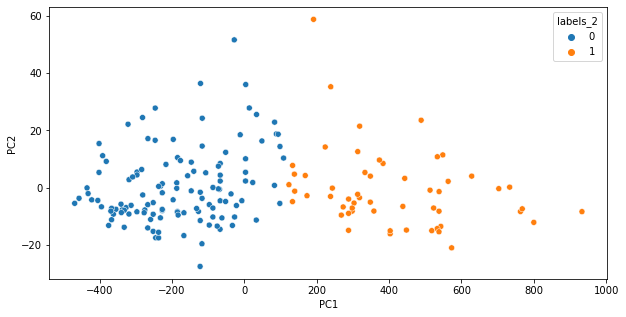

In [19]:
# Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
c = pd.DataFrame(pca.fit_transform(wine_data), columns=["PC1", "PC2"])
c['labels_2'] = labels_2
plt.figure(figsize=(10,5))
sns.scatterplot(x=c['PC1'],y=c['PC2'],hue=c['labels_2'])

In [20]:
#Normalization
from sklearn import preprocessing
X=preprocessing.normalize(wine_data)
X=pd.DataFrame(X)
X

0         1         2         3         4         5         6   \
0    0.013264  0.001594  0.002265  0.014542  0.118383  0.002610  0.002852   
1    0.012513  0.001687  0.002029  0.010617  0.094794  0.002512  0.002616   
2    0.011063  0.001984  0.002245  0.015636  0.084906  0.002354  0.002724   
3    0.009680  0.001314  0.001684  0.011317  0.076119  0.002593  0.002351   
4    0.017775  0.003477  0.003853  0.028193  0.158418  0.003759  0.003611   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.018364  0.007568  0.003282  0.027460  0.127252  0.002250  0.000817   
174  0.017691  0.005162  0.003274  0.030366  0.134666  0.002376  0.000990   
175  0.015723  0.005071  0.002678  0.023697  0.142180  0.001884  0.000818   
176  0.015514  0.003051  0.002792  0.023559  0.141355  0.001944  0.000801   
177  0.024834  0.007206  0.004816  0.043060  0.168724  0.003603  0.001336   

           7         8         9         10        11        12  
0    0.000261  0.002135  0.005257  0.000969  0.003654  0.992738  
1    0.000246  0.001213  0.004152  0.000995  0.003223  0.995336  
2    0.000252  0.002362  0.004775  0.000866  0.002665  0.996176  
3    0.000162  0.001468  0.005254  0.000579  0.002324  0.996961  
4    0.000524  0.002443  0.005800  0.001396  0.003934  0.986753  
..        ...       ...       ...       ...       ...       ...  
173  0.000697  0.001420  0.010314  0.000857  0.002331  0.991225  
174  0.000568  0.001862  0.009638  0.000924  0.002060  0.990194  
175  0.000509  0.001600  0.012085  0.000699  0.001848  0.989336  
176  0.000624  0.001720  0.010955  0.000707  0.001908  0.989482  
177  0.000984  0.002373  0.016169  0.001072  0.002812  0.984223  

[178 rows x 13 columns]

C:\Users\sivae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


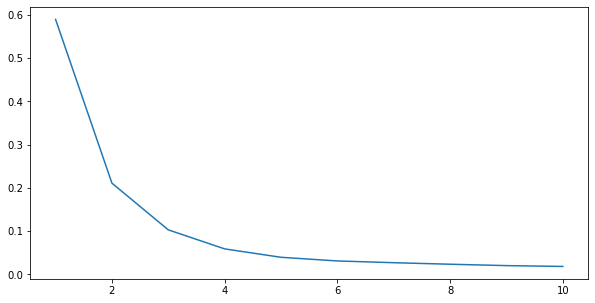

In [21]:
# Elbow method
plt.figure(figsize=(10,5))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [22]:
#KMeans
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
labels_no = kmeans1.fit_predict(X)
labels_no

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
#Silhouette Score
score_no = silhouette_score(X, labels_no, metric='euclidean')
print('Silhouette Score: %.3f' % score_no)

Silhouette Score: 0.523


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

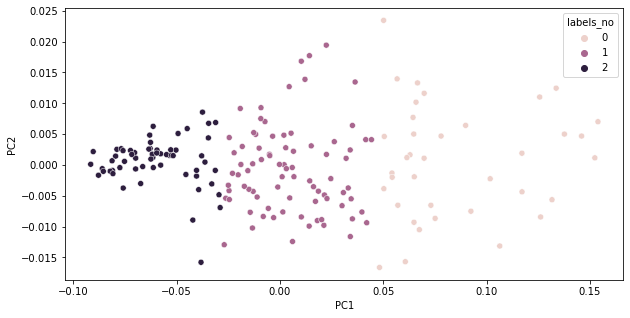

In [24]:
# Visualization
pca = PCA(n_components = 2)
b = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
b['labels_no'] = labels_no
plt.figure(figsize=(10,5))
sns.scatterplot(x=b['PC1'],y=b['PC2'],hue=b['labels_no'])

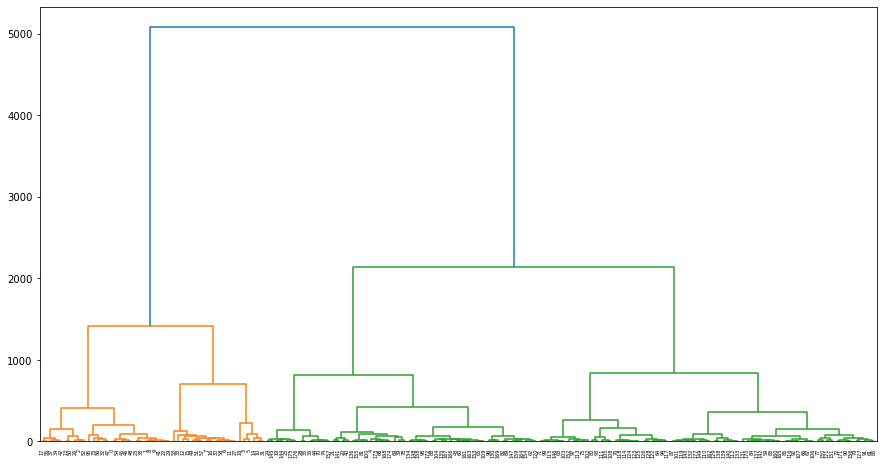

In [25]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(wine_data,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

In [27]:
# Heirarchial Clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_hc=cluster.fit_predict(wine_data)
labels_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [29]:
#Silhouette Score
score_hc = silhouette_score(wine_data, labels_hc, metric='euclidean')
print('Silhouette Score: %.3f' % score_hc)

Silhouette Score: 0.659


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

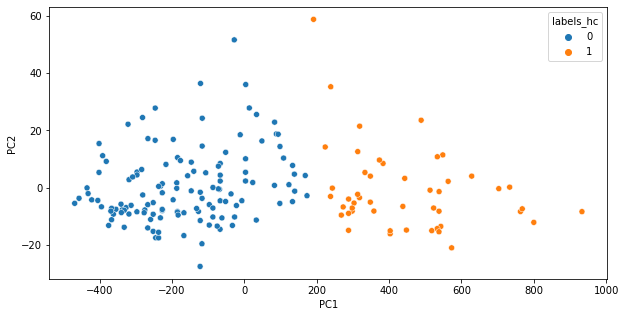

In [31]:
# Visualization
pca = PCA(n_components = 2)
a = pd.DataFrame(pca.fit_transform(wine_data), columns=["PC1", "PC2"])
a['labels_hc'] = labels_hc
plt.figure(figsize=(10,5))
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['labels_hc'])

In [34]:
wine_data['labels_2']=labels_2
wine_data

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  labels_2  
0     3.92     1065         1  
1     3.40     1050         1  
2     3.17     1185         1  
3     3.45     1480         1  
4     2.93      735         0  
..     ...      ...       ...  
173   1.74      740         0  
174   1.56      750         0  
175   1.56      835         0  
176   1.62      840         0  
177   1.60      560         0  

[178 rows x 14 columns]